In [1]:
import os
import numpy as np
import pandas as pd
from collections import defaultdict

os.chdir('../pnl/')
pnl_file_dict = defaultdict()
for file in os.listdir():
    if file.endswith('.csv'):
        pnl_file_dict[file] = pd.read_csv(file)
    else:
        continue
    print(file)


votality_PNL_alpha_2.csv
votality_PNL_alpha_3.csv
votality_PNL_alpha_1.csv


# 开始验证统计没错

In [2]:
df = pnl_file_dict['votality_PNL_alpha_1.csv']
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
print(df.columns)

Index(['date', 'pnl', 'longsize', 'shortsize', 'ret', 'holdpnl', 'tradepnl',
       'poscov', 'negcov', 'pospnl', 'negpnl', 'IC', 'index_ret', 'rankpnl1',
       'rankpnl2', 'rankpnl3', 'rankpnl4', 'rankpnl5', 'rankpnl6', 'rankpnl7',
       'rankpnl8', 'rankpnl9', 'rankpnl10'],
      dtype='object')


<Axes: >

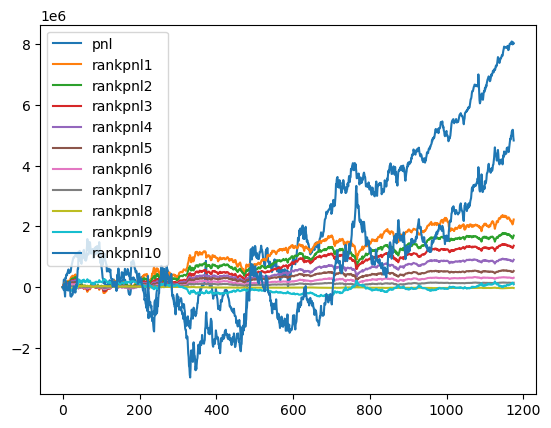

In [19]:
df_new = df[['pnl','rankpnl1', 'rankpnl2', 'rankpnl3','rankpnl4','rankpnl5','rankpnl6','rankpnl7','rankpnl8', 'rankpnl9', 'rankpnl10']]
df_new.cumsum().plot()

<Axes: >

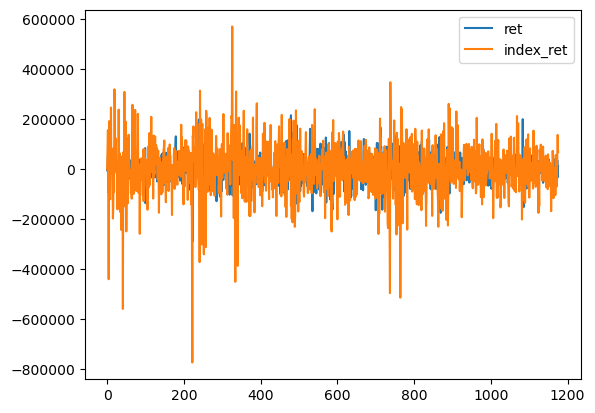

In [28]:
df_ret = df[['ret', 'index_ret']].apply(lambda x: (x*10000000))
df_ret.plot()

<Axes: >

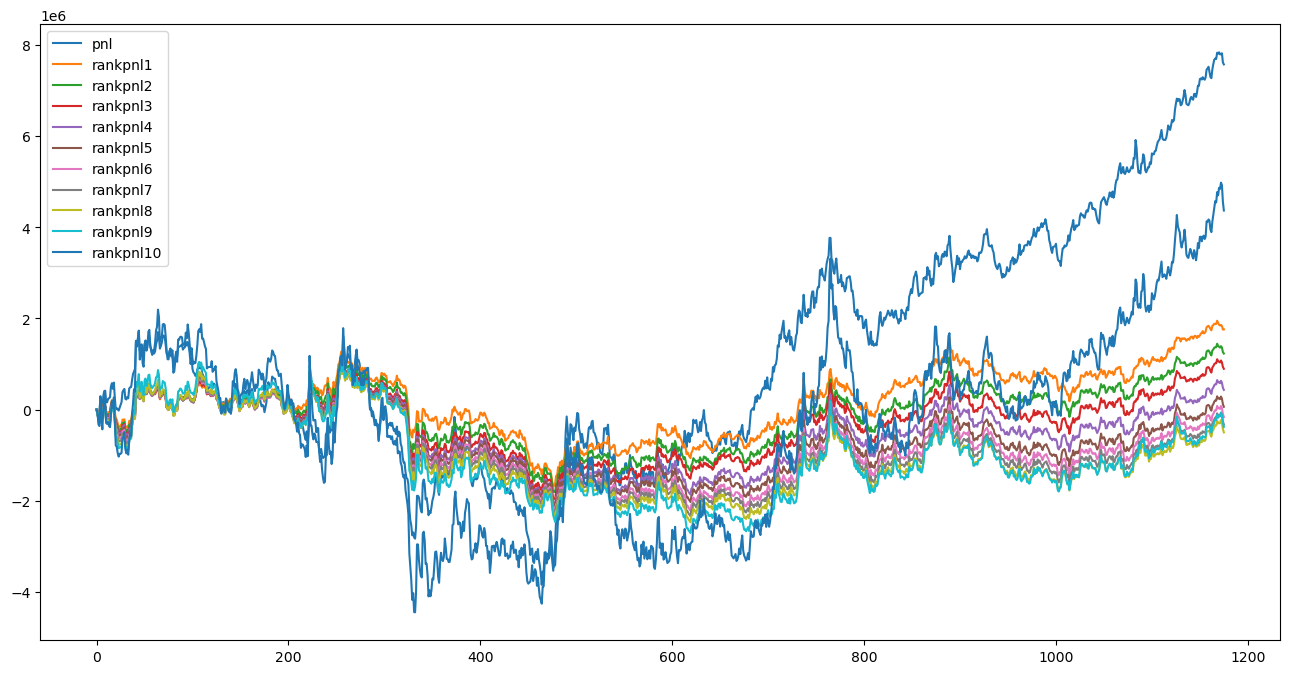

In [30]:
df_new.apply(lambda x: (x-df_ret['index_ret']).cumsum()).plot(figsize=(16,8))

In [34]:
df_2020 = df[df['date'].dt.year == 2020]
df_2020.head(5)

,date,pnl,longsize,shortsize,ret,holdpnl,tradepnl,poscov,negcov,pospnl,...,rankpnl2,rankpnl3,rankpnl4,rankpnl5,rankpnl6,rankpnl7,rankpnl8,rankpnl9,rankpnl10,marketpnl
206,2020-01-02,-21314.53,10000000.0,-10000000.0,-0.001066,-91721.391763,73573.663860,2703,1023,171896.84,...,35457.00,28748.40,23849.77,17369.84,13460.87,7341.77,-2877.31,-25357.72,-162467.74,-21320.0
207,2020-01-03,974.22,10000000.0,-10000000.0,0.000049,12.464053,11755.087649,2717,996,49169.43,...,10672.68,7722.02,5662.20,5684.06,3387.36,2437.03,-604.00,-8544.14,-33285.05,980.0
208,2020-01-06,-31321.99,10000000.0,-10000000.0,-0.001566,-80213.902123,52082.966499,2751,962,70249.38,...,10631.10,10249.82,11014.18,9955.85,6484.32,3172.38,-816.28,-8633.21,-89840.24,-31320.0
209,2020-01-07,18692.97,10000000.0,-10000000.0,0.000935,-8605.237426,29913.876650,2731,983,130177.08,...,25930.27,20435.66,15729.20,13862.91,9865.77,7369.92,-1622.88,-15868.18,-91801.31,18700.0
210,2020-01-08,-39683.68,10000000.0,-10000000.0,-0.001984,-12975.287460,-22135.022007,2726,988,-136280.05,...,-24159.78,-21457.21,-21031.32,-15940.55,-10673.47,-6427.21,1100.39,18393.78,79438.83,-39680.0


In [42]:
df_2020['pnl'].sum() / df_2020['tradepnl'].sum()

-4.234458894784113